# 6. 
In this exercise, you will further analyze the Wage data set considered
throughout this chapter.

In [206]:
library(ISLR)
data("Wage")

head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


## (a) 
Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.

   - A K-5 cross-validation tells us that a fourth-degree polynomial yields the smallest error. Cross-validation agrees with the results of ANOVA which indicate that a cubic or a quartic polynomial is the most adequate. We perform an analysis of variance in order to test the null hypothesis that a model *A* is sufficient to explain the data against the alternative hypothesis that a more complex *B* is required. In this case, p-values indicate the lower-order functions are not sufficient and higher-order functions may be insignificant.


In [169]:
options(scipen = 999)

[1] 4


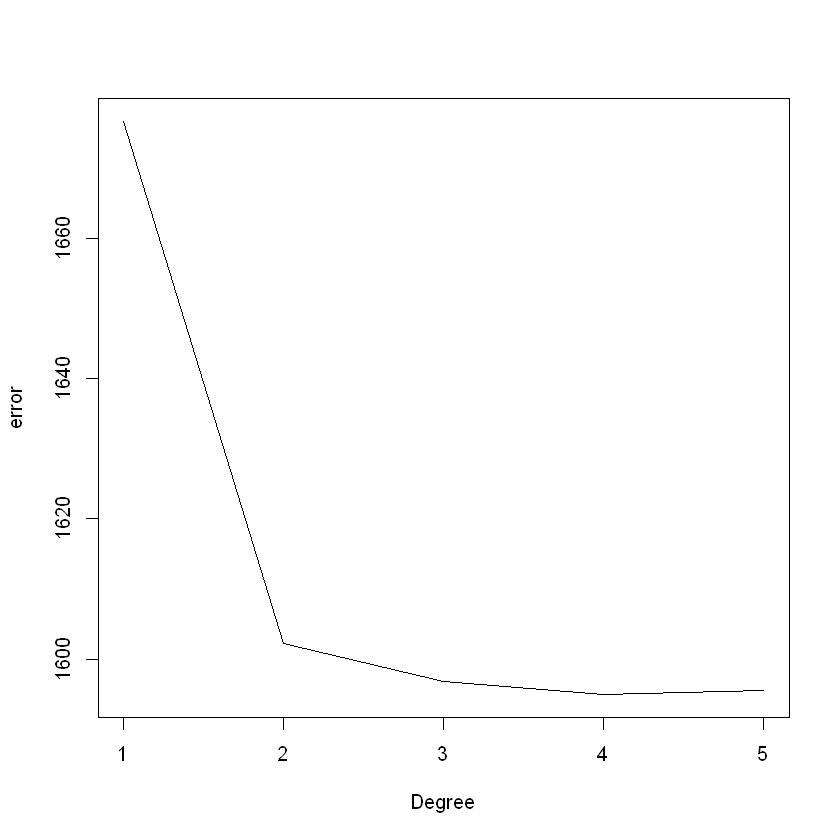

In [170]:
errs = c()
K <- 5
for (i in 1:K) {
    glm.fit = glm(wage~poly(age, i), data=Wage)
    errs[i] = cv.glm(Wage, glm.fit, K=10)$delta[2]
}

print(which.min(errs))
plot(1:K, errs, xlab="Degree", ylab="error", type="l")

In [171]:
# ref: lab, p.290
fit.1= lm(wage~age ,data=Wage)
fit.2= lm(wage~poly(age, 2) ,data=Wage)
fit.3= lm(wage~poly(age, 3) ,data=Wage)
fit.4= lm(wage~poly(age, 4) ,data=Wage)
fit.5= lm(wage~poly(age, 5) ,data=Wage)

anova(fit.1, fit.2, fit.3, fit.4, fit.5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2998,5022216,NA,NA,NA,NA
2,2997,4793430,1,228786.010,143.5931074,0.00000000000000000000000000000002367734
3,2996,4777674,1,15755.694,9.8887559,0.00167921282630841234122243132986795899
4,2995,4771604,1,6070.152,3.8098134,0.05104623133270855955823108729418891016
5,2994,4770322,1,1282.563,0.8049758,0.36968196597431635108677028256352059543


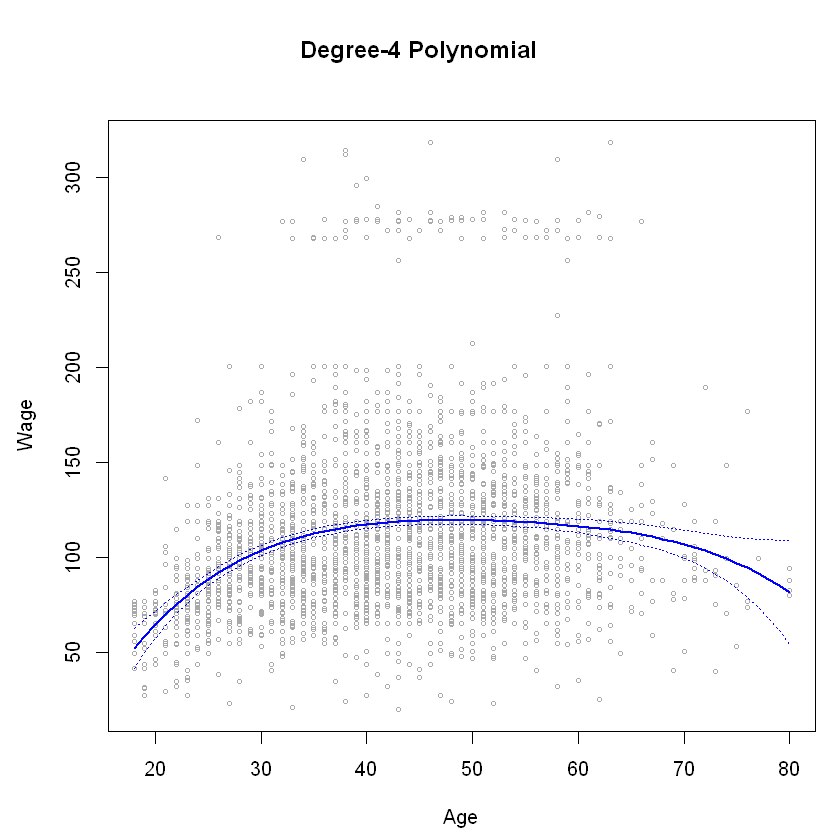

In [519]:
# ref: p.289

fit = lm(wage~poly(age, 4), data=Wage)

agelims = range(Wage$age)
age.grid = seq(from=agelims[1], to=agelims[2])
preds = predict(fit, newdata=list(age=age.grid), se=TRUE)
se.bands = cbind(preds$fit +2* preds$se.fit, preds$fit-2*preds$se.fit)

par(mfrow=c(1,1), mar=c(4.5 ,4.5 ,1 ,1), oma=c(0,0,4,0))

plot(Wage$age, Wage$wage, xlim=agelims, cex =.5, col = "darkgrey", xlab="Age", ylab="Wage")
title ("Degree-4 Polynomial", outer=T)
lines(age.grid, preds$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

## (b) 
Fit a step function to predict wage using age, and perform crossvalidation
to choose the optimal number of cuts. Make a plot of
the fit obtained.

[1] 8


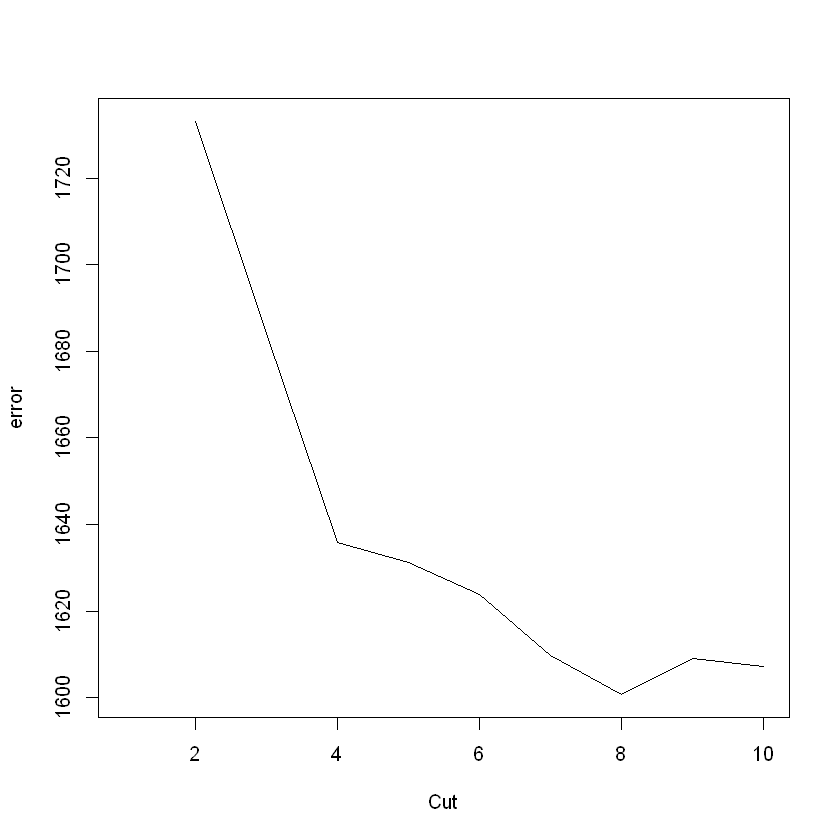

In [208]:
errs = c()
K <- 10
for (i in 2:K) {
    Wage$age.cut = cut(Wage$age, i)
    glm.fit = glm(wage~age.cut, data=Wage)
    errs[i] = cv.glm(Wage, glm.fit, K=K)$delta[2]
}

print(which.min(errs))
plot(1:K, errs, xlab="Cut", ylab="error", type="l")

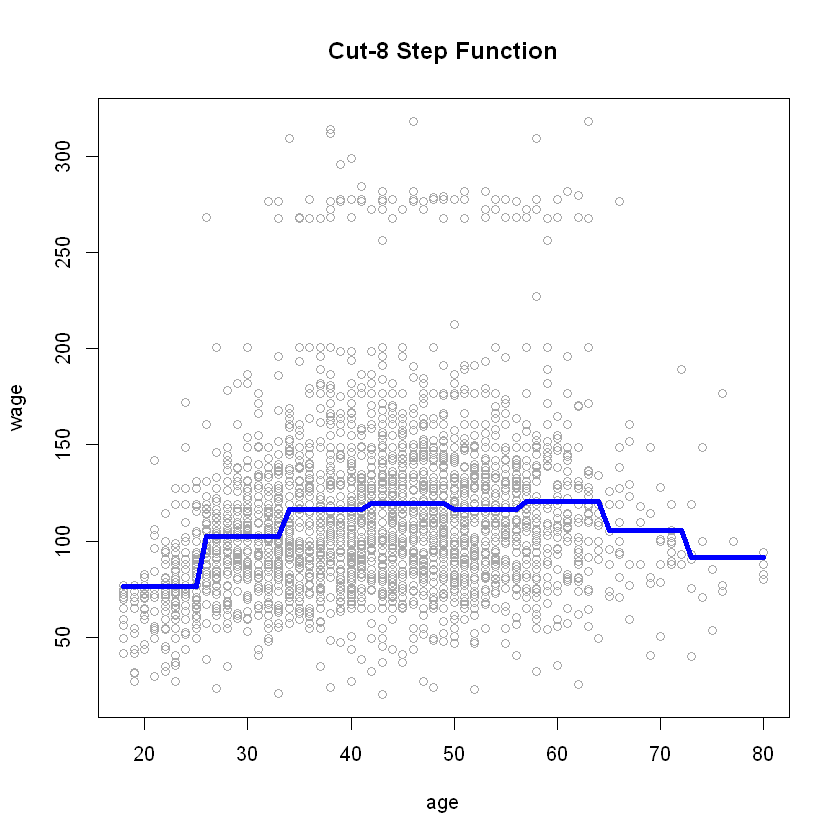

In [211]:
fit = glm(wage~cut(age, 8), data=Wage)

agelims = range(Wage$age)
age.grid = seq(from=agelims[1], to=agelims[2])

preds = predict(fit, data.frame(age=age.grid))

plot(wage~age, data=Wage, col="darkgrey")
title ("Cut-8 Step Function")

lines(age.grid, preds, col="blue", lwd=4)

##  7. 
The Wage data set contains a number of other features not explored
in this chapter, such as marital status (maritl), job class (jobclass),
and others. Explore the relationships between some of these other
predictors and wage, and use non-linear fitting techniques in order to
fit flexible models to the data. Create plots of the results obtained,
and write a summary of your findings.

- After a brief analysis of the attributes and building a linear benchmark, we find suitable inputs to the GAM method. Next, we attempt to fit two formulas for GAM. One which is mostly inflexible with smoothing splines for age. Second, we add an additional smoothing spline for level of education. Ultimately, we find that deviance steadily decreases as we introduce more complexity. An anova test, which explains whether the more complex model is significantly better at modeling the data than a simpler one, confirms that a more complex model is more suitable for this problem.

In [312]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

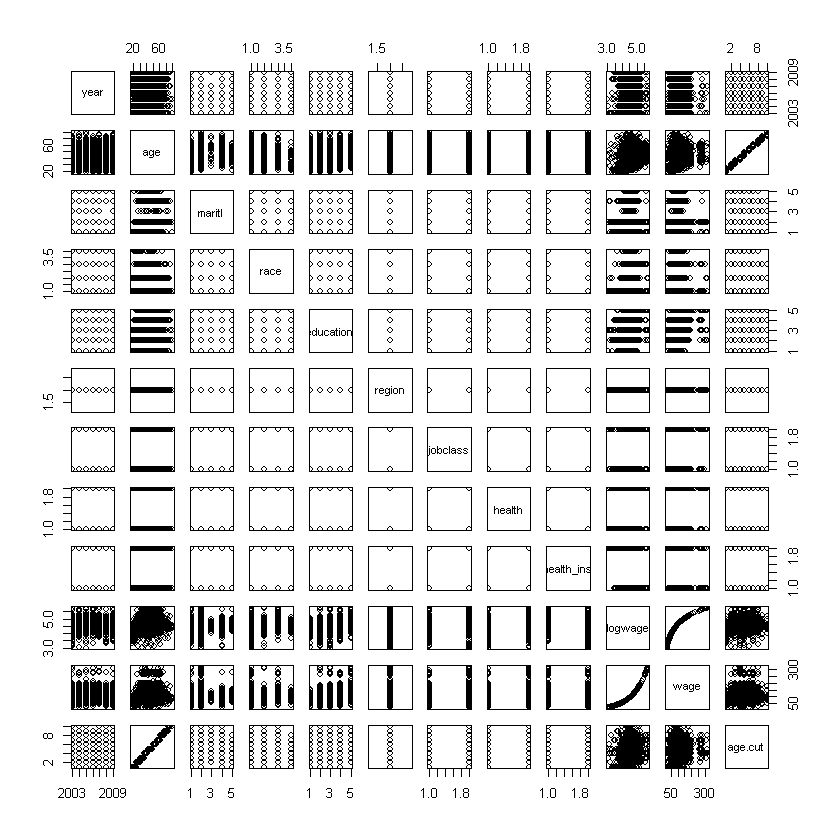

In [212]:
plot(Wage)

In [217]:
head(Wage)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age.cut
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315,"(17.9,24.2]"
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602,"(17.9,24.2]"
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218,"(42.8,49]"
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529,"(42.8,49]"
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315,"(49,55.2]"
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574,"(49,55.2]"


In [473]:
data = na.omit(subset(Wage, select=-c(age.cut, logwage)))
data['married'] <- ifelse(data$maritl == '2. Married', 1, 0)
data['hs'] <- ifelse(data$health_ins == '1. Yes', 1, 0)
data['edu'] <- as.numeric(data$education)

In [463]:
for (c in colnames(data)) {
    print(c)
    print(cor(as.numeric(data[[c]]), data$wage))
}

[1] "year"
[1] 0.06554428
[1] "age"
[1] 0.1956372
[1] "maritl"
[1] 0.06735972
[1] "race"
[1] -0.02686538
[1] "education"
[1] 0.4757749
[1] "region"


Warning message in cor(as.numeric(data[[c]]), data$wage):
"the standard deviation is zero"


[1] NA
[1] "jobclass"
[1] 0.2068969
[1] "health"
[1] 0.1523375
[1] "health_ins"
[1] -0.3083097
[1] "wage"
[1] 1
[1] "married"
[1] 0.2567127
[1] "hs"
[1] 0.3083097


In [475]:
bench = lm(wage~married+age+edu+jobclass+health+hs, data=data)
summary(bench)


Call:
lm(formula = wage ~ married + age + edu + jobclass + health + 
    hs, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-106.25  -19.40   -3.48   13.97  208.09 

Coefficients:
                       Estimate Std. Error t value             Pr(>|t|)    
(Intercept)            28.09925    2.97932   9.431 < 0.0000000000000002 ***
married                15.76950    1.43766  10.969 < 0.0000000000000002 ***
age                     0.33284    0.05874   5.667         0.0000000159 ***
edu                    13.34917    0.55703  23.965 < 0.0000000000000002 ***
jobclass2. Information  3.50051    1.32363   2.645              0.00822 ** 
health2. >=Very Good    6.73681    1.43162   4.706         0.0000026444 ***
hs                     17.13173    1.40939  12.155 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.29 on 2993 degrees of freedom
Multiple R-squared:  0.326,	Adjusted R-squared:  0.3246 
F-statist

In [487]:
deviance(bench)

[1] 3519856

In [466]:
# install.packages('gam')

In [467]:
library(gam)

In [476]:
gam.fit1 <- gam(wage~married+edu+jobclass+health+hs+s(age, 4), data=data)

summary(gam.fit1)


Call: gam(formula = wage ~ married + edu + jobclass + health + hs + 
    s(age, 4), data = data)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-109.513  -19.209   -3.397   14.004  205.030 

(Dispersion Parameter for gaussian family taken to be 1156.148)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3456881 on 2990 degrees of freedom
AIC: 29684.16 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
            Df  Sum Sq Mean Sq F value                Pr(>F)    
married      1  280536  280536 242.647 < 0.00000000000000022 ***
edu          1 1046455 1046455 905.123 < 0.00000000000000022 ***
jobclass     1   20864   20864  18.046        0.000022223146 ***
health       1   18287   18287  15.817        0.000071431913 ***
hs           1  176205  176205 152.407 < 0.00000000000000022 ***
s(age, 4)    1   46609   46609  40.314        0.000000000249 ***
Residuals 2990 3456881    1156                                  
---
Signif

In [477]:
deviance(gam.fit1)

[1] 3456881

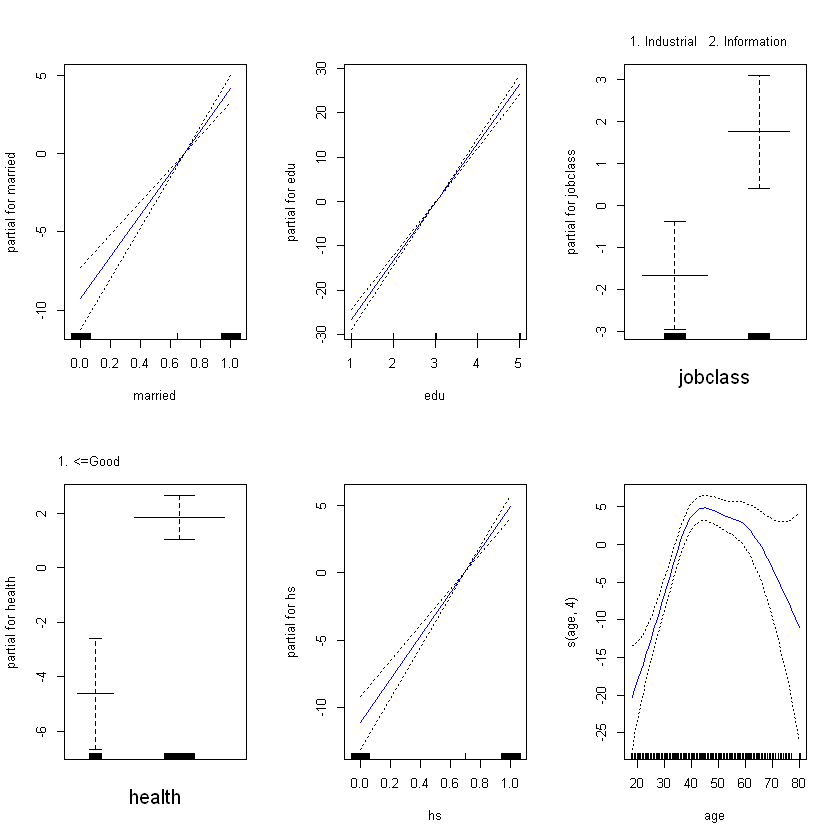

In [478]:
par(mfrow =c(2,3))
plot(gam.fit1, se=TRUE ,col ="blue ")

In [485]:
gam.fit2 <- gam(wage~married+jobclass+health+hs+s(age, 4)+s(edu,4), data=data)
deviance(gam.fit2)

[1] 3421373

In [486]:
anova(bench, gam.fit1, gam.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2993,3519856,NA,NA,NA,NA
2,2990,3456881,3.000166,62975.02,18.32559,0.000000000008827353
3,2987,3421373,3.000000,35508.82,10.33356,0.000000915912843128


# 9. 
This question uses the variables dis (the weighted mean of distances
to five Boston employment centers) and nox (nitrogen oxides concentration
in parts per 10 million) from the Boston data. We will treat
dis as the predictor and nox as the response.

In [490]:
library("MASS")

In [492]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## (a) 
Use the poly() function to fit a cubic polynomial regression to
predict nox using dis. Report the regression output, and plot
the resulting data and polynomial fits.

[1] 4


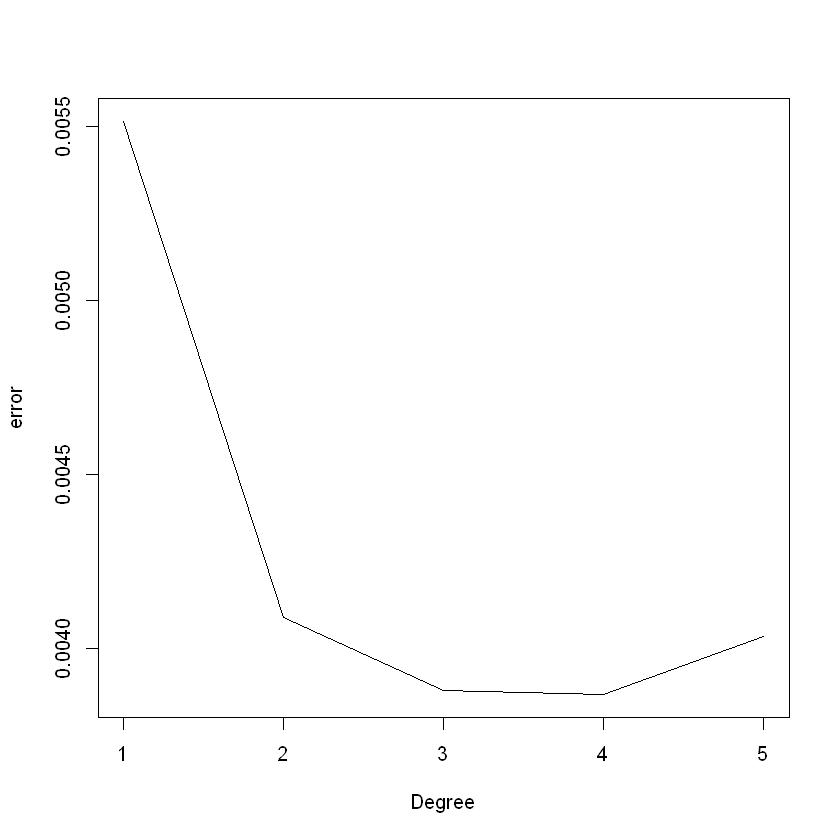

In [570]:
errs = c()
K <- 5
for (i in 1:K) {
    glm.fit = glm(nox~poly(dis, i), data=Boston)
    errs[i] = cv.glm(Boston, glm.fit, K=K)$delta[2]
}

d = which.min(errs)
print(d)
plot(1:K, errs, xlab="Degree", ylab="error", type="l")

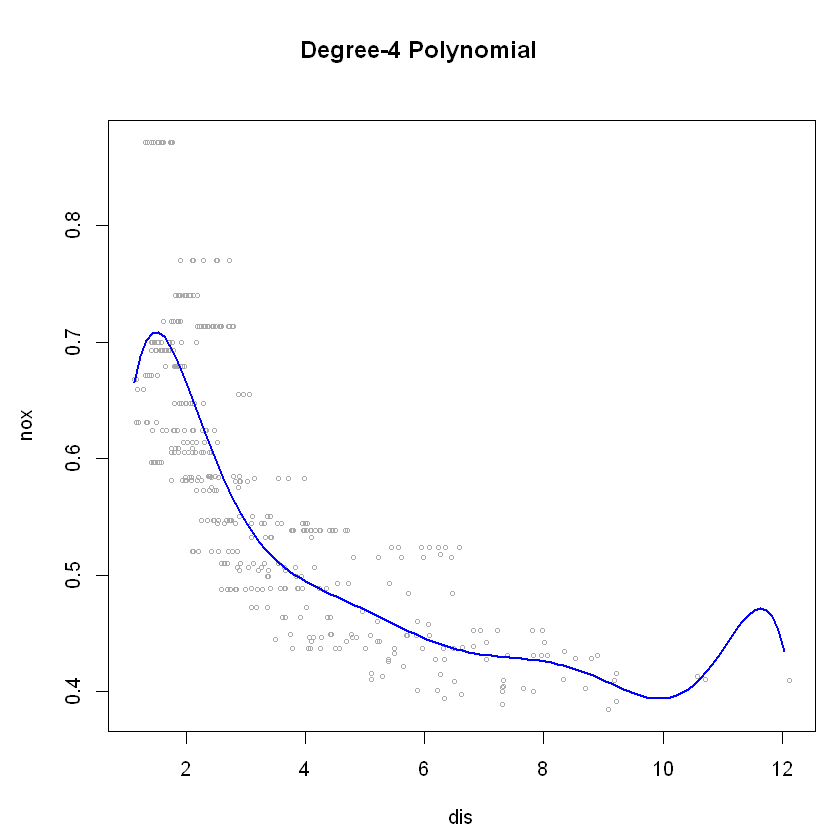

In [613]:
fit = glm(nox~poly(dis, d), data=Boston)

# print(summary(fit))

dislim = range(Boston$dis)
dis.grid = seq(from = dislim[1], to = dislim[2], by = 0.1)

preds = predict(fit, newdata=list(dis=dis.grid), se=TRUE)

se.bands = cbind(preds$fit +2* preds$se.fit, preds$fit-2*preds$se.fit)
par(mfrow=c(1,1), mar=c(4.5 ,4.5 ,1 ,1), oma=c(0,0,4,0))

plot(Boston$dis, Boston$nox, xlim=dislims, cex =.5, col = "darkgrey", xlab="dis", ylab="nox")
title ("Degree-4 Polynomial", outer=T)

lines(dis.grid, preds$fit, col = "blue", lwd = 2)

## (b) 

Plot the polynomial fits for a range of different polynomial
degrees (say, from 1 to 10), and report the associated residual
sum of squares.

In [614]:
K <- 10
for (i in 1:K) {
    glm.fit = glm(nox~poly(dis, i), data=Boston)
    print(i)
    print(deviance(glm.fit))
}

[1] 1
[1] 2.768563
[1] 2
[1] 2.035262
[1] 3
[1] 1.934107
[1] 4
[1] 1.932981
[1] 5
[1] 1.91529
[1] 6
[1] 1.878257
[1] 7
[1] 1.849484
[1] 8
[1] 1.83563
[1] 9
[1] 1.833331
[1] 10
[1] 1.832171


## (c) 

Perform cross-validation or another approach to select the optimal
degree for the polynomial, and explain your results.

- When performing a K-10 cross-validation we discover that error and deviance reach minimums at a degree of 8. However, the degrees are much more volatile in this range.

[1] 3


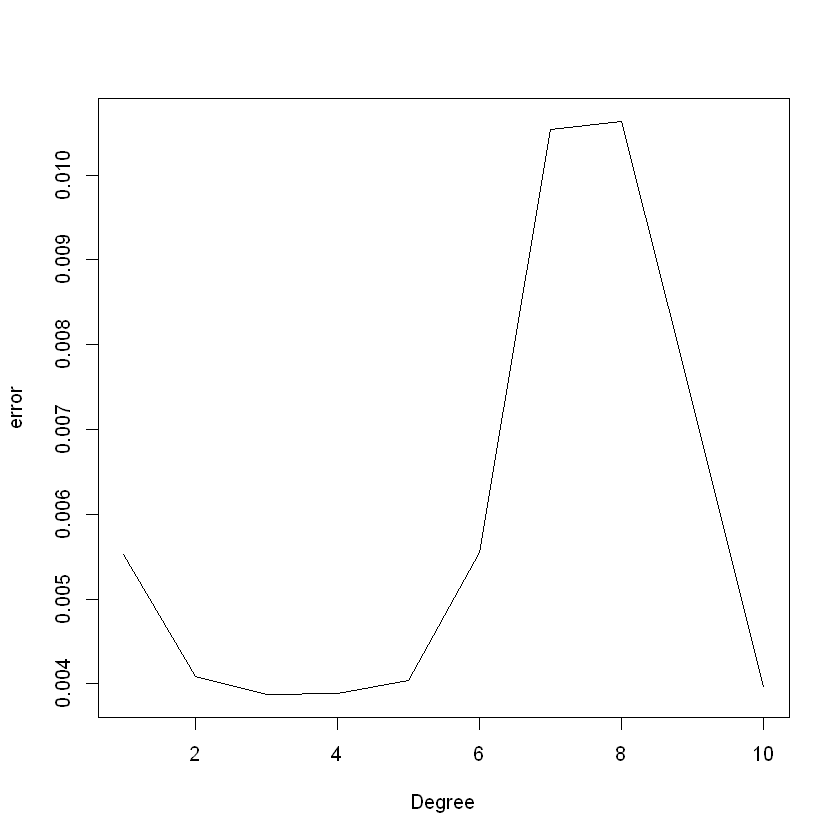

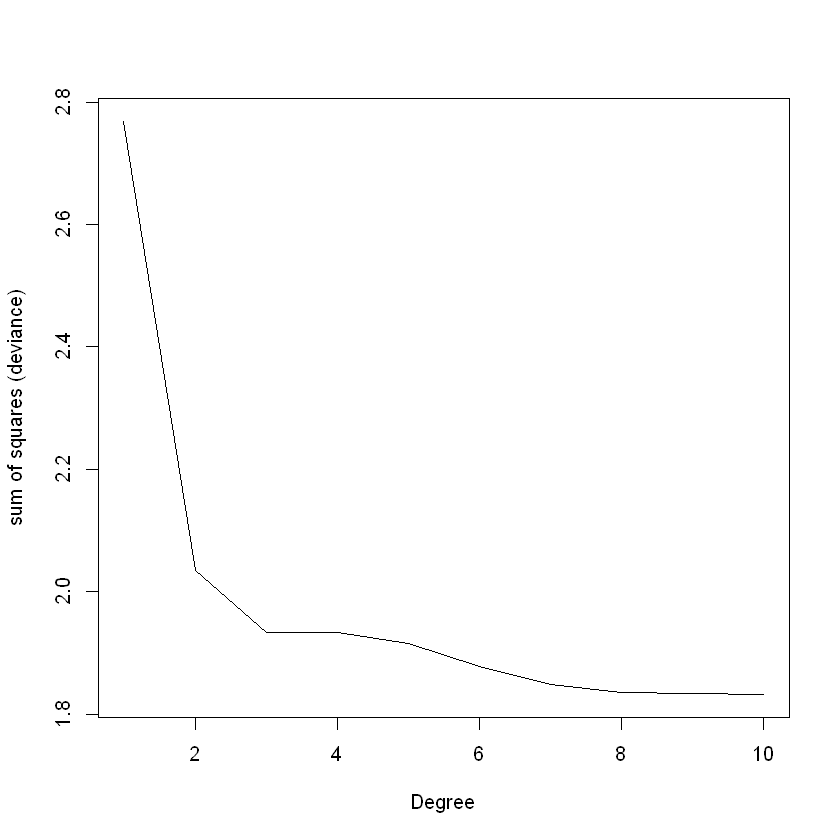

In [615]:
errs = c()
devi = c()
K <- 10
for (i in 1:K) {
    glm.fit = glm(nox~poly(dis, i), data=Boston)
    errs[i] = cv.glm(Boston, glm.fit, K=K)$delta[2]
    devi[i] = deviance(glm.fit)
}

d = which.min(errs)
print(d)

plot(1:K, errs, xlab="Degree", ylab="error", type="l")
plot(1:K, devi, xlab="Degree", ylab="sum of squares (deviance)", type="l")

## (d) 
Use the bs() function to fit a regression spline to predict nox
using dis. Report the output for the fit using four degrees of
freedom. How did you choose the knots? Plot the resulting fit.

Generally, only few knot points (5 or less) are needed for a cubic spline.I placed 5 across the range of X to fit K + 1 different cubic polynomials.

In [616]:
min(Boston$dis)
max(Boston$dis)

[1] 1.1296

[1] 12.1265

In [635]:
library(splines)

rs.fit = lm(nox ~ bs(dis, df = 4, knots = c(1, 5, 7, 9, 11)), data = Boston)
summary(rs.fit)


Call:
lm(formula = nox ~ bs(dis, df = 4, knots = c(1, 5, 7, 9, 11)), 
    data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121904 -0.040850 -0.008803  0.023645  0.193881 

Coefficients: (1 not defined because of singularities)
                                            Estimate Std. Error t value
(Intercept)                                  0.41000    0.06208   6.604
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))1  0.33863    0.06326   5.353
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))2  0.18658    0.06444   2.895
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))3  0.01749    0.06539   0.268
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))4  0.04899    0.06519   0.751
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))5 -0.03638    0.07641  -0.476
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))6  0.07609    0.16730   0.455
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))7 -0.15977    0.39936  -0.400
bs(dis, df = 4, knots = c(1, 5, 7, 9, 11))8       NA         NA      NA
                    

## (e) 

Now fit a regression spline for a range of degrees of freedom, and
plot the resulting fits and report the resulting RSS. Describe the
results obtained.

- It appears that the degrees of freedom have no impact on the RSS or the fit when knots points are provided. However, when knots points are not given, the RSS decreases as DOF increase. 

In [636]:
library(glue)

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


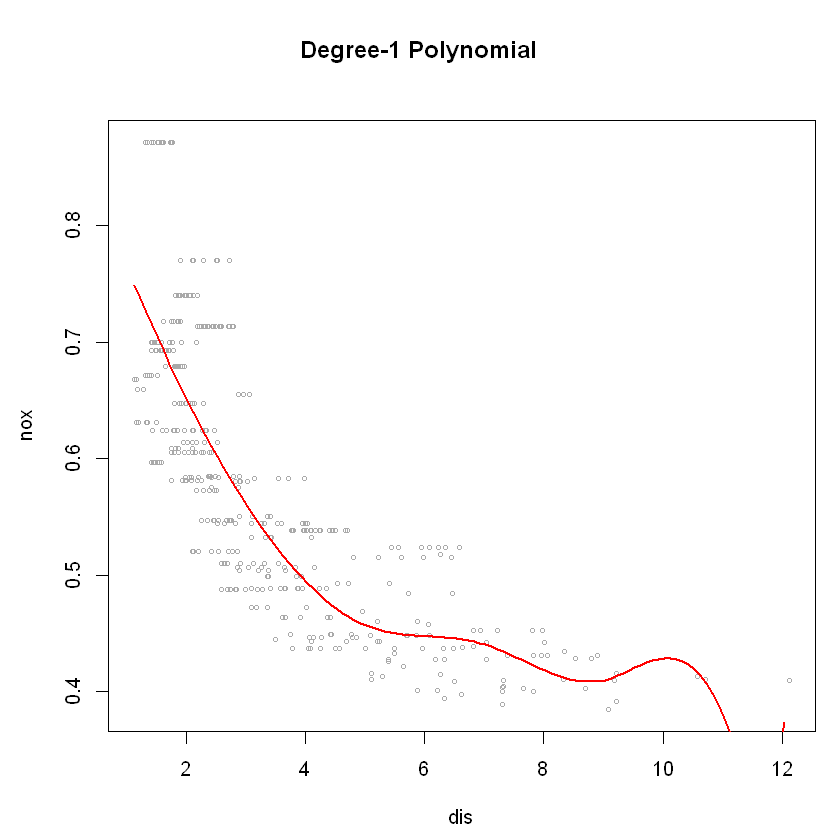

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


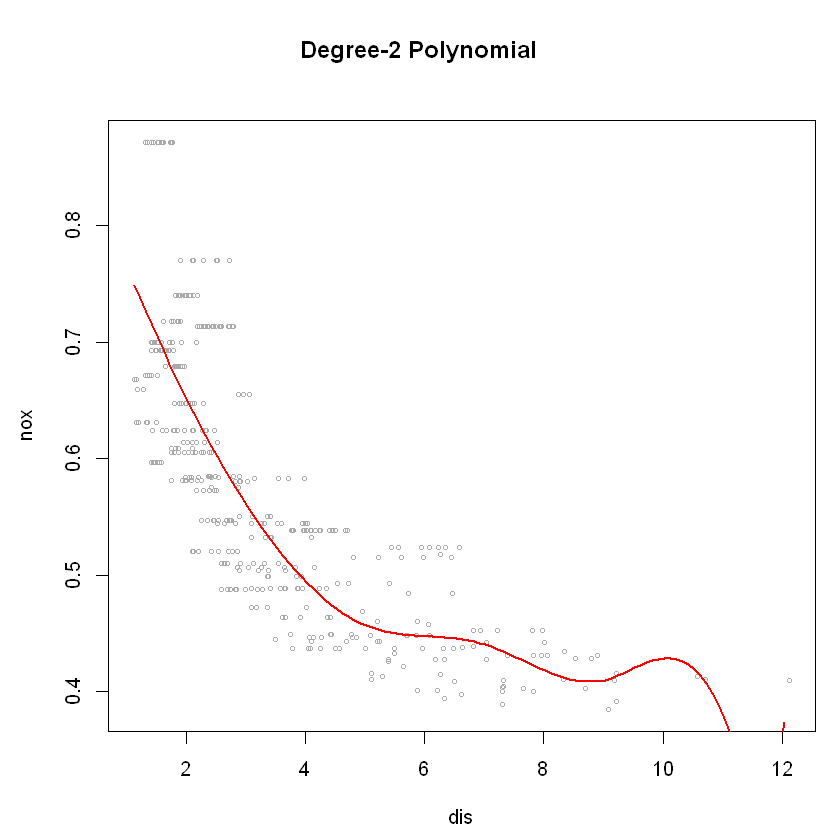

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


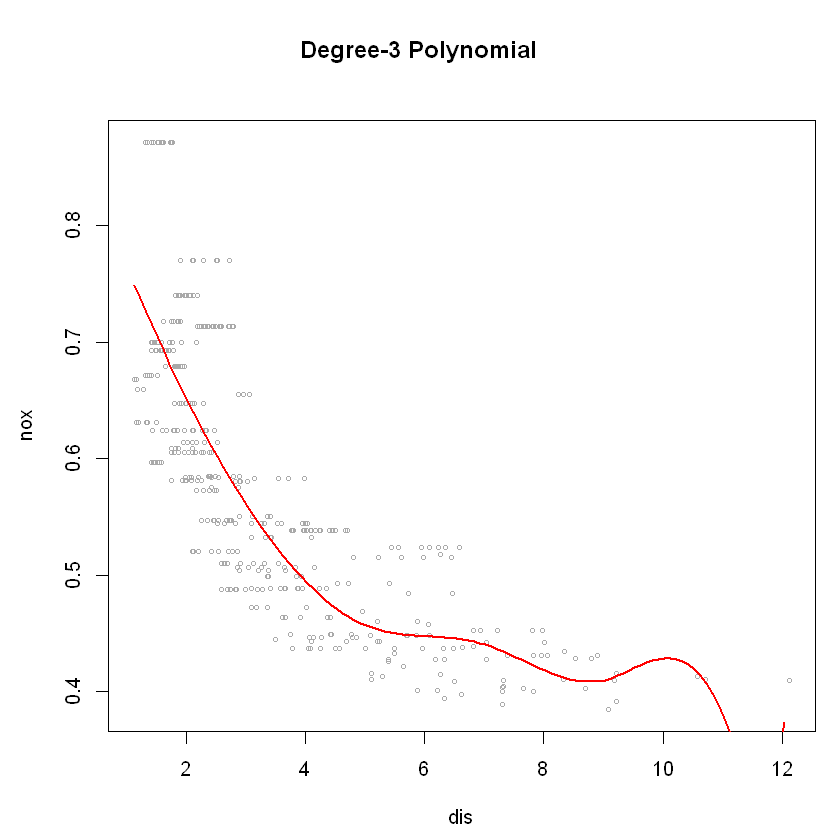

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


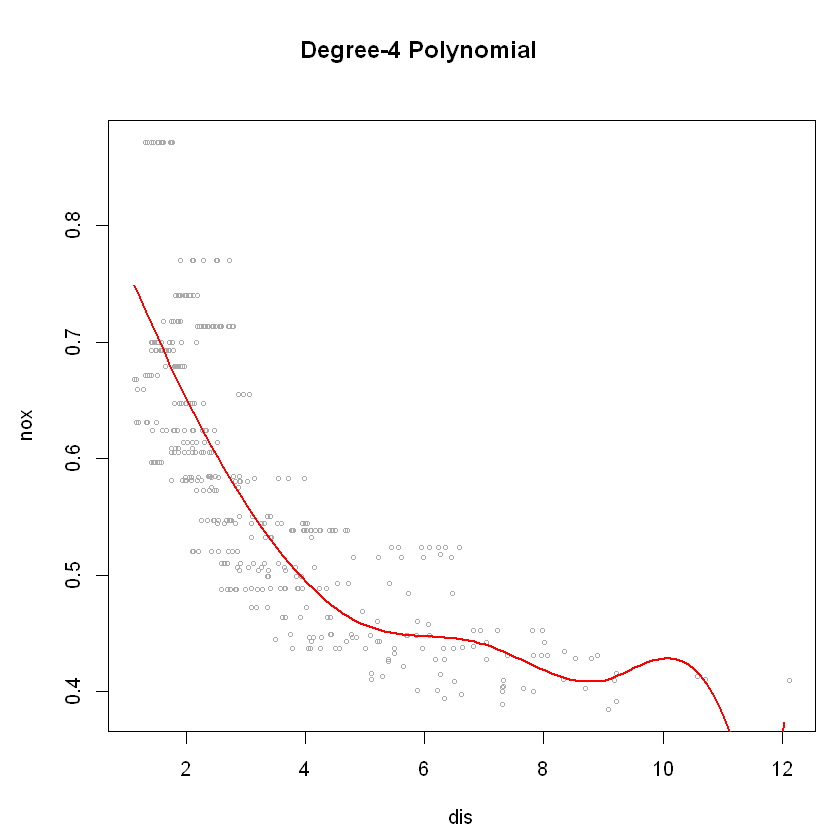

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


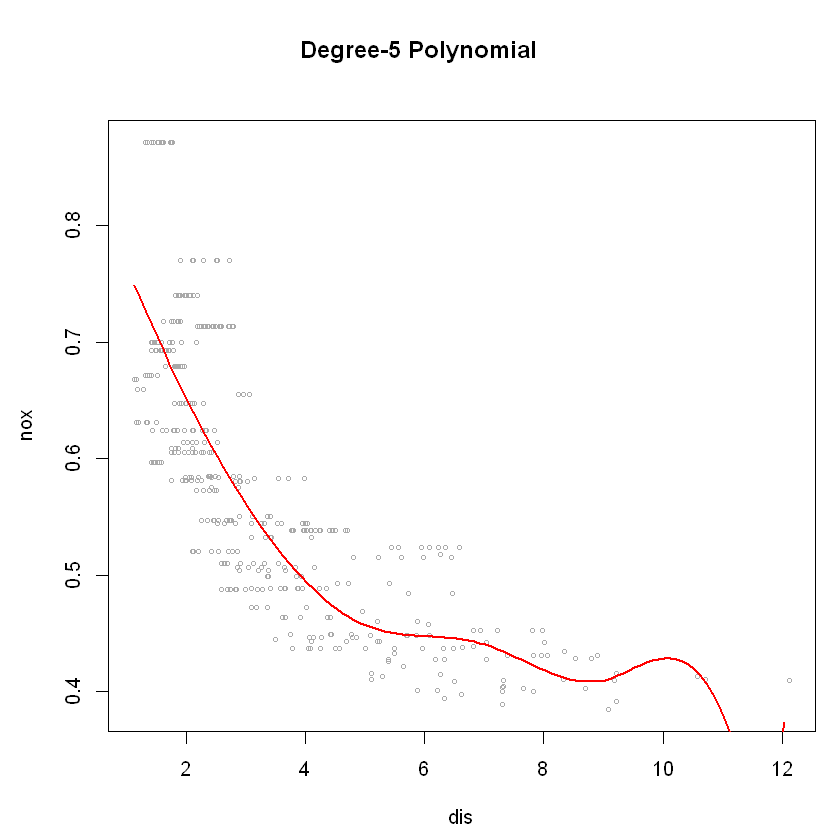

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


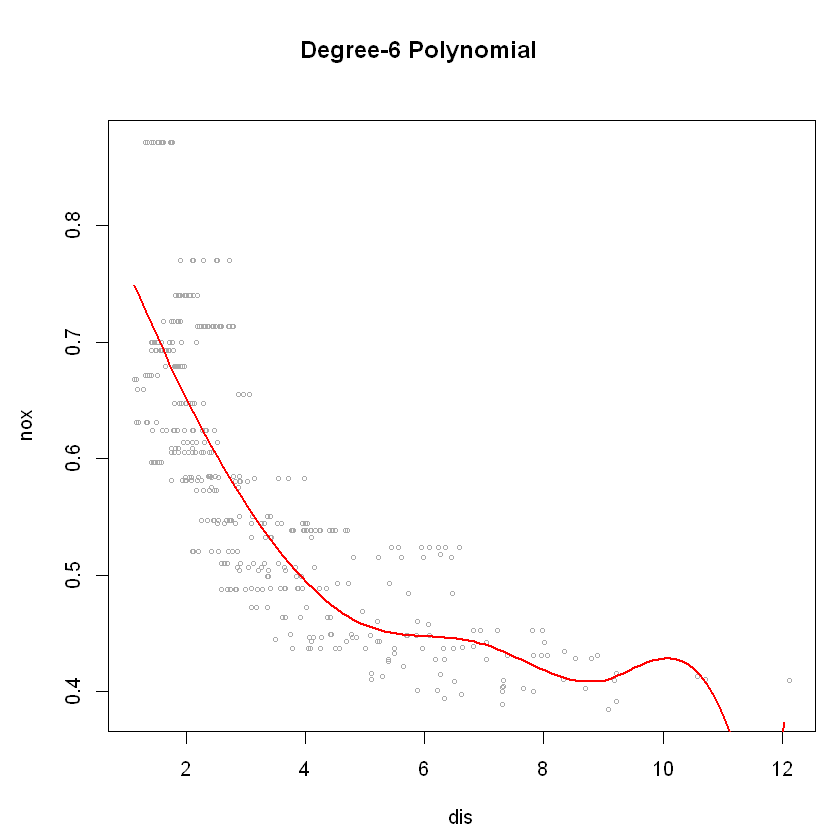

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


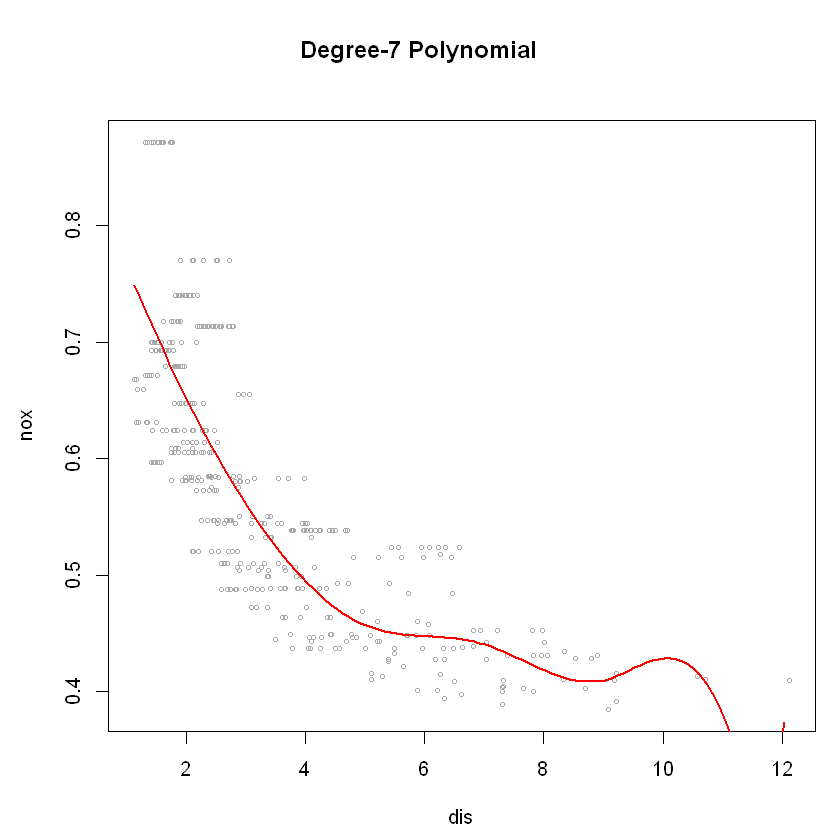

Warning message in predict.lm(rs.fit, newdata = list(dis = dis.grid), se = TRUE):
"prediction from a rank-deficient fit may be misleading"


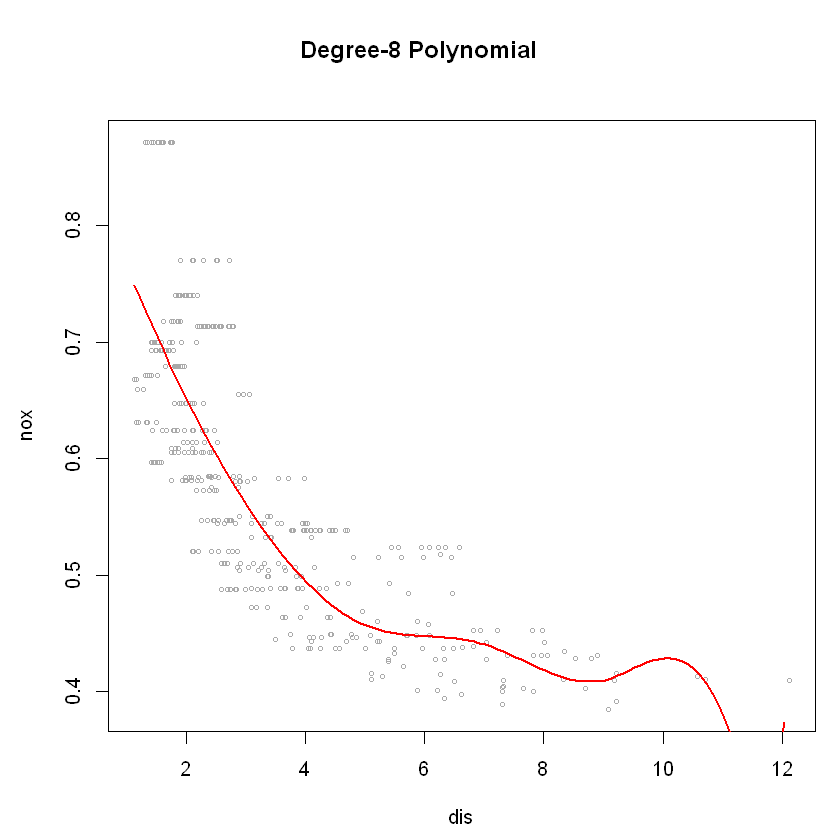

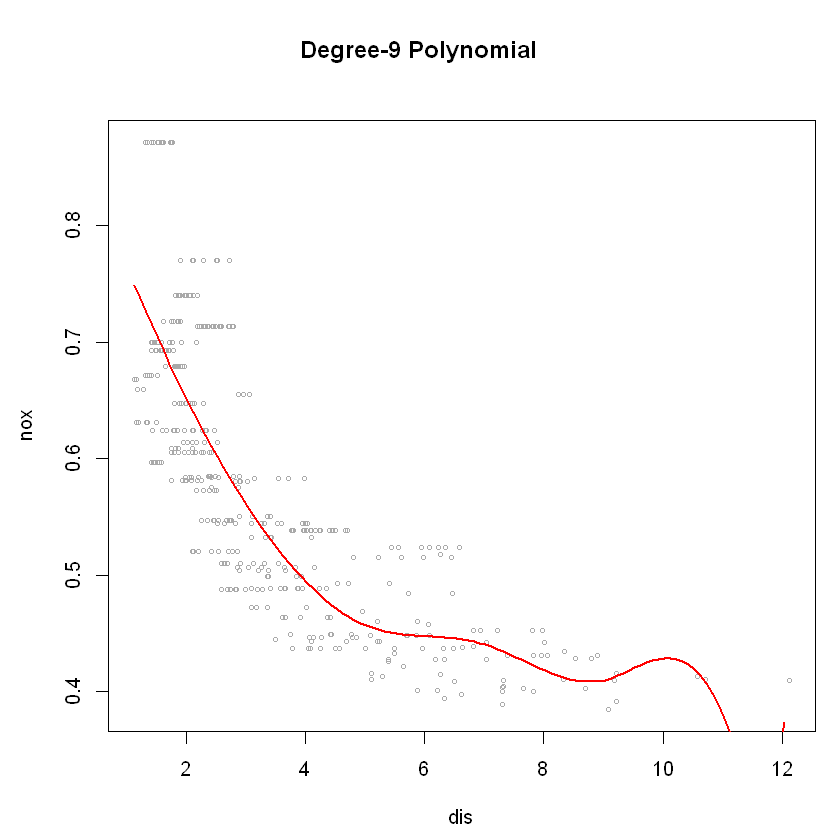

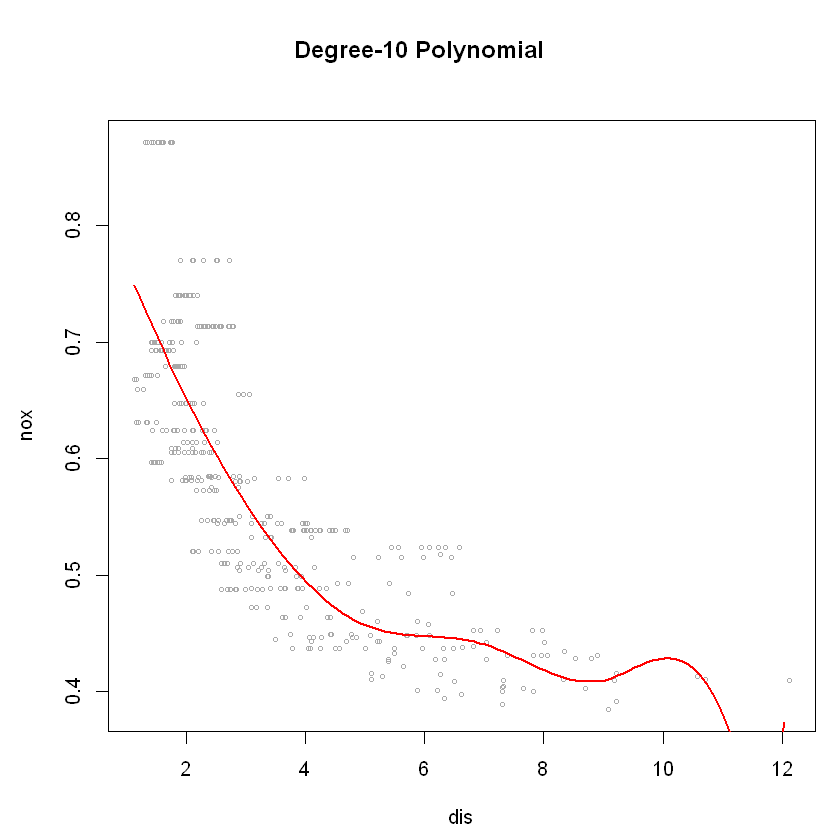

In [655]:
devi = c()
K <- 10
for (i in 1:K) {
    rs.fit = lm(nox ~ bs(dis, df = i, knots = c(1, 5, 7, 9, 11)), data = Boston)

    preds = predict(rs.fit, newdata=list(dis=dis.grid), se=TRUE)

    se.bands = cbind(preds$fit +2* preds$se.fit, preds$fit-2*preds$se.fit)
    
    par(mfrow=c(1,1), mar=c(4.5 ,4.5 ,1 ,1), oma=c(0,0,4,0))
    plot(Boston$dis, Boston$nox, xlim=dislims, cex =.5, col = "darkgrey", xlab="dis", ylab="nox")
    title (glue("Degree-{i} Polynomial"), outer=T)

    lines(dis.grid, preds$fit, col = "red", lwd = 2)
    
    devi[i] = deviance(rs.fit)
}

In [656]:
devi

[1] 1.919388 1.919388 1.919388 1.919388 1.919388 1.919388 1.919388 1.919388
 [9] 1.919388 1.919388

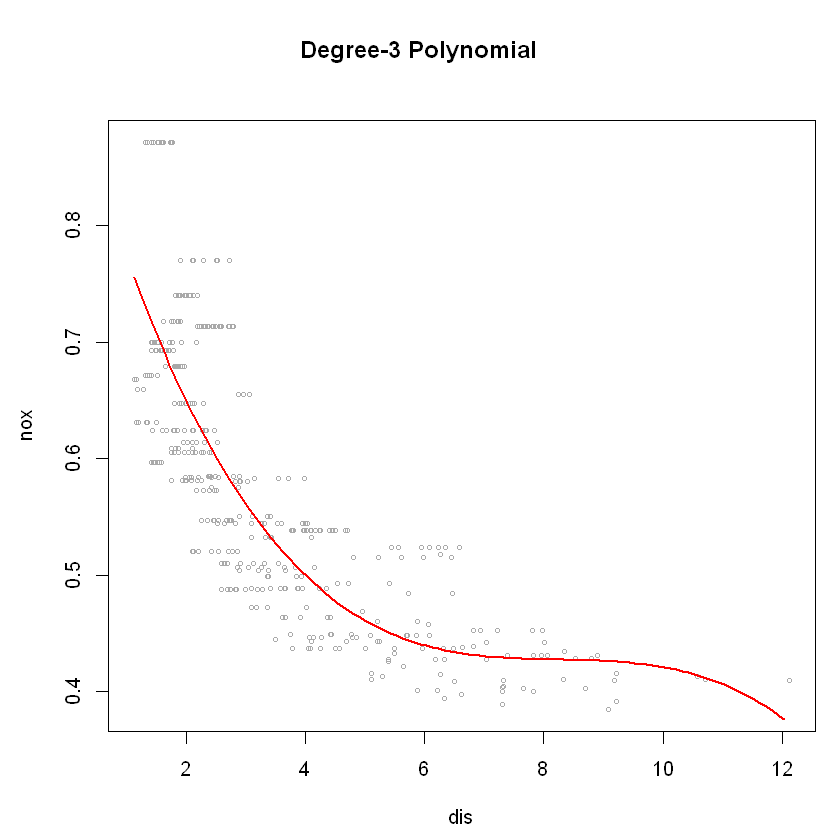

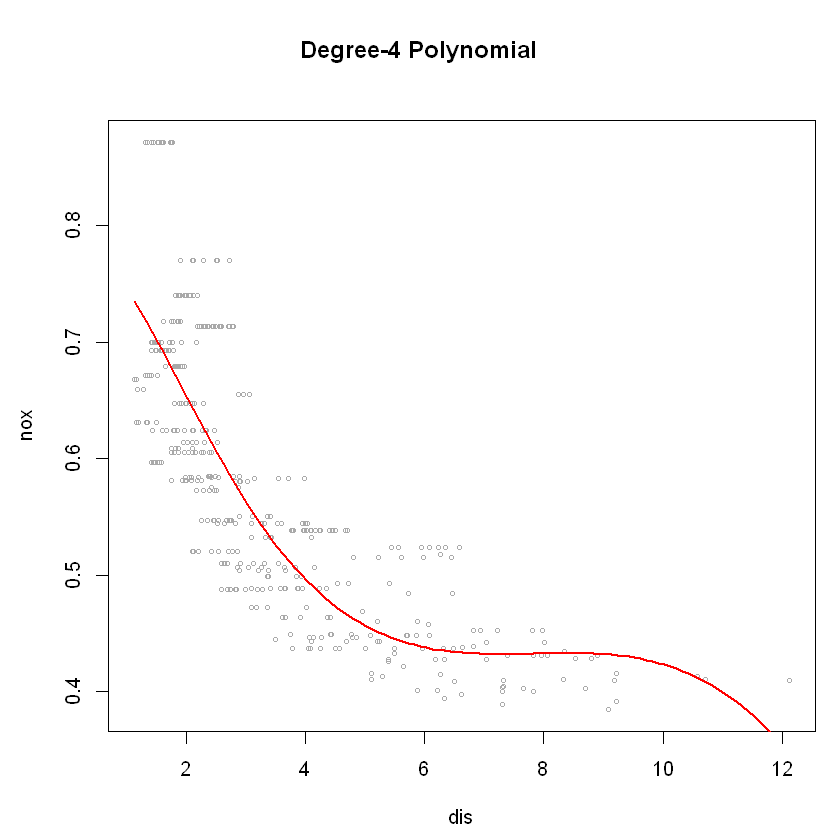

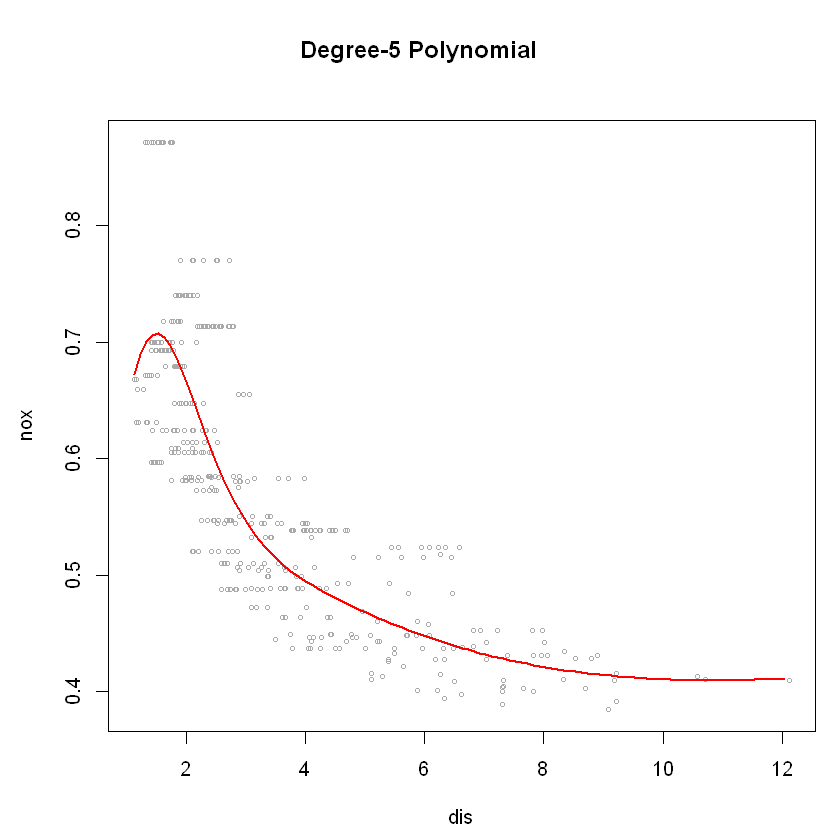

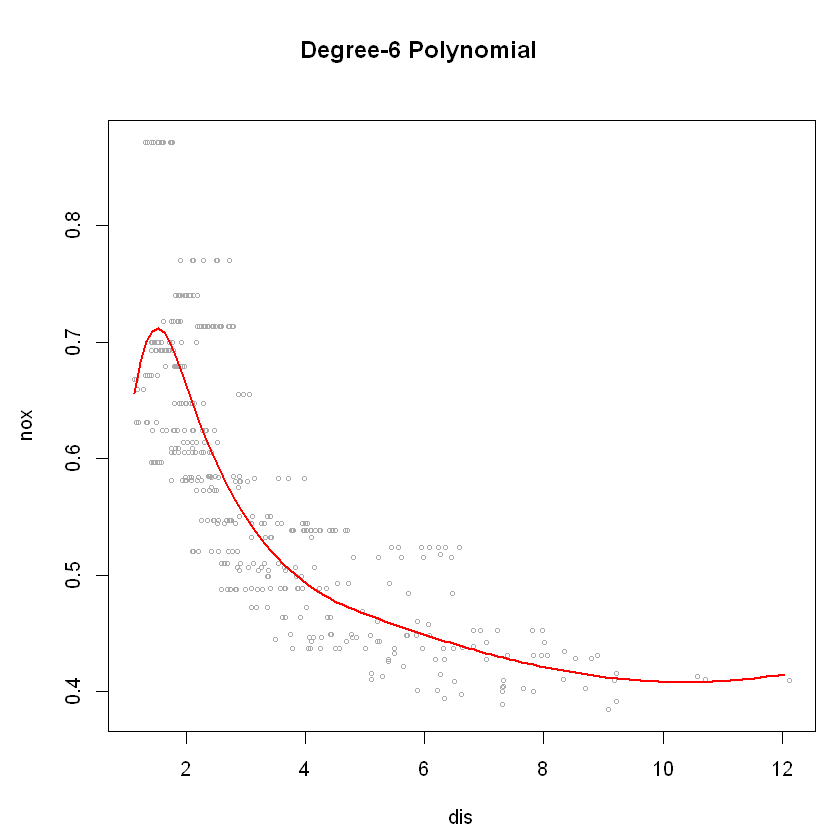

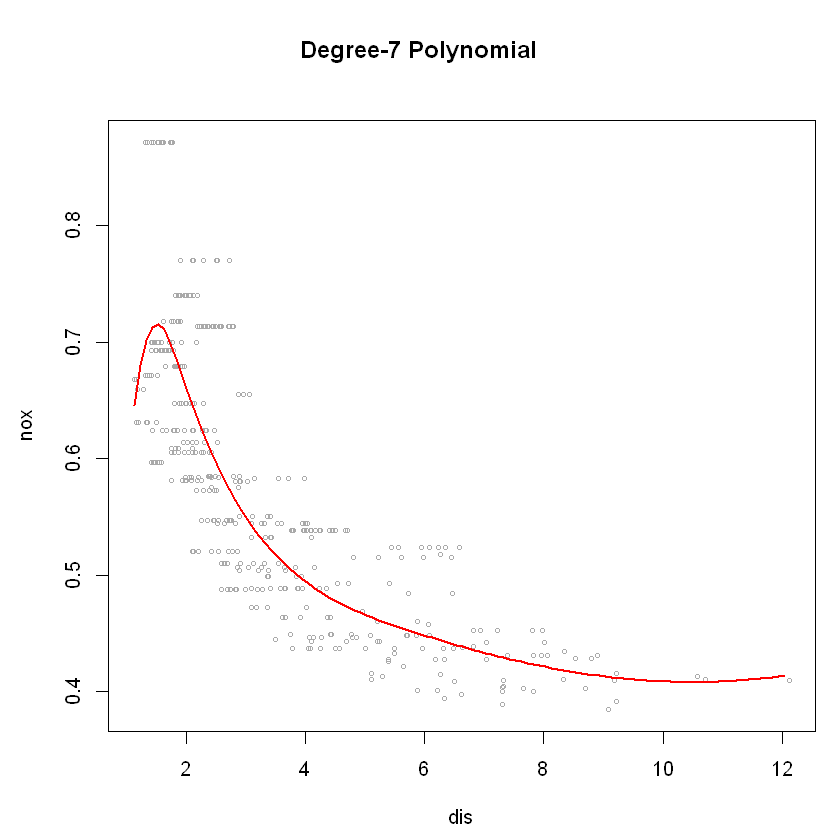

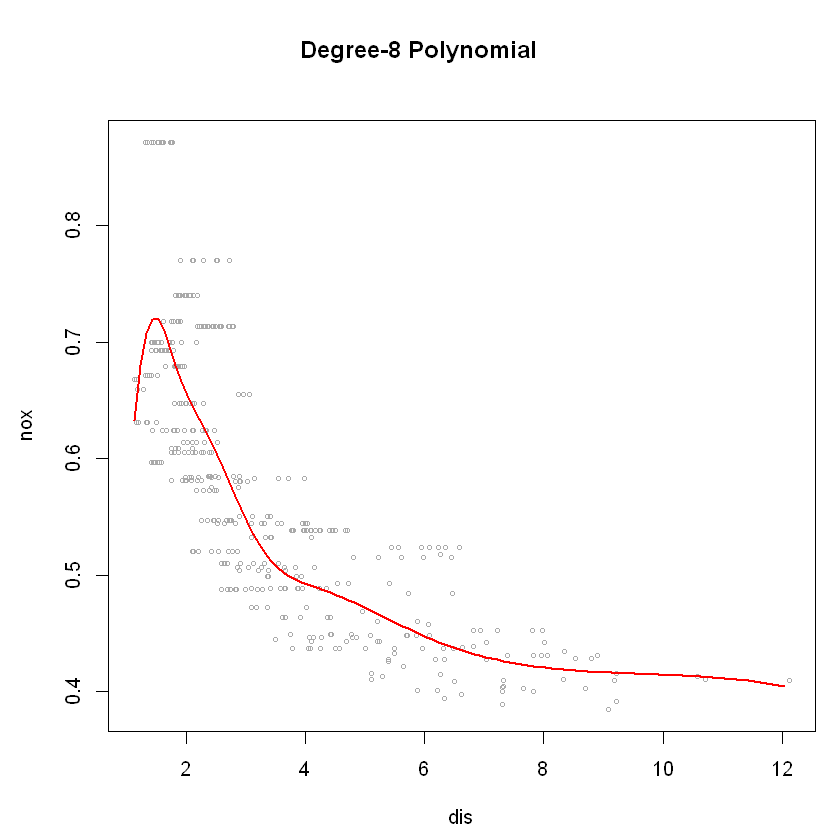

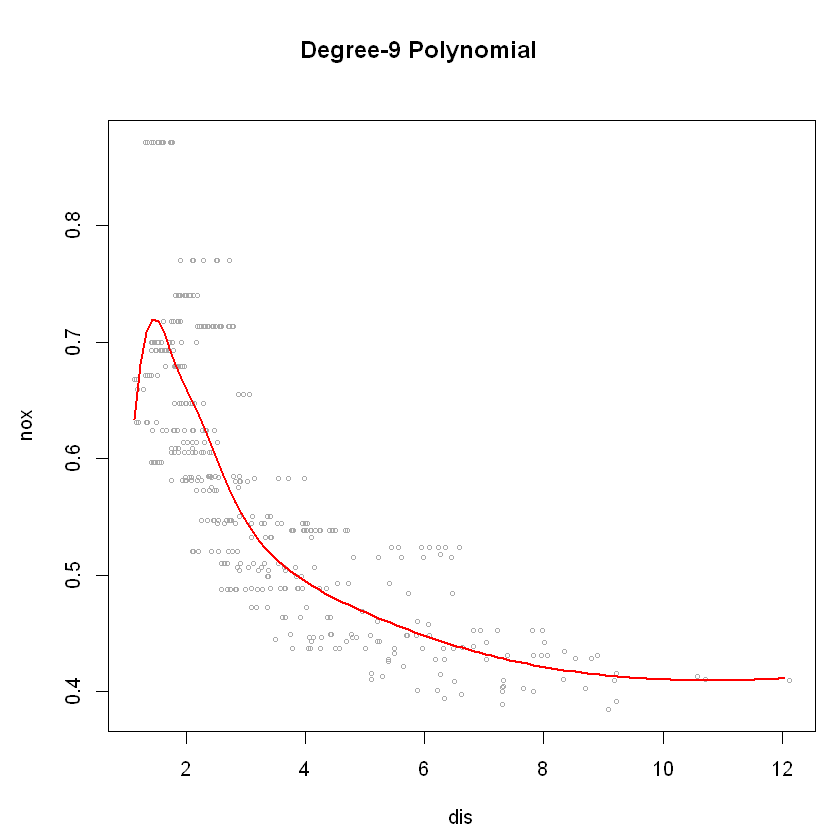

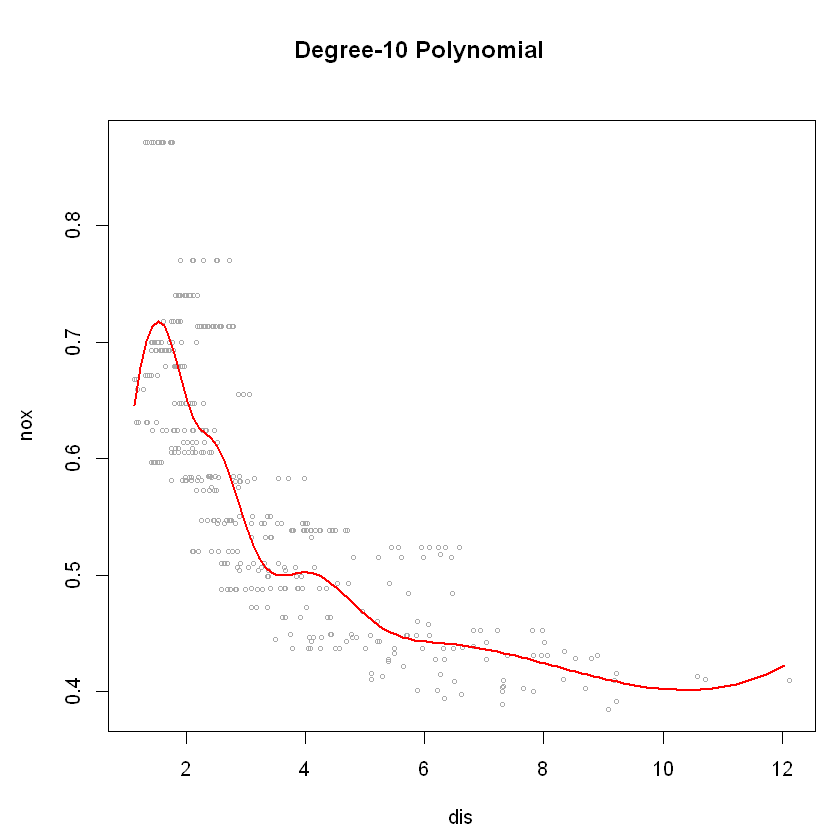

In [682]:
devi2 = c()
K <- 10
for (i in 3:K) {
    rs.fit = glm(nox ~ bs(dis, df = i), data = Boston)

    preds = predict(rs.fit, newdata=list(dis=dis.grid), se=TRUE)

    se.bands = cbind(preds$fit +2* preds$se.fit, preds$fit-2*preds$se.fit)
    
    par(mfrow=c(1,1), mar=c(4.5 ,4.5 ,1 ,1), oma=c(0,0,4,0))
    plot(Boston$dis, Boston$nox, xlim=dislims, cex =.5, col = "darkgrey", xlab="dis", ylab="nox")
    title (glue("Degree-{i} Polynomial"), outer=T)

    lines(dis.grid, preds$fit, col = "red", lwd = 2)
    
    devi2[i] = deviance(rs.fit)
}

## (f) 

Perform cross-validation or another approach in order to select
the best degrees of freedom for a regression spline on this data.
Describe your results.

- At DOF 8, the model fits our data relatively well, ignoring extremeties while still following changes. 

In [693]:
err2 = c()
K <- 10
for (i in 3:K) {
    rs.fit = glm(nox ~ bs(dis, df = i), data = Boston)
    err2[i] = cv.glm(Boston, rs.fit, K=K)$delta[2]
}

which.min(err2)
err2[8]

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(

[1] 8

[1] 0.003680087

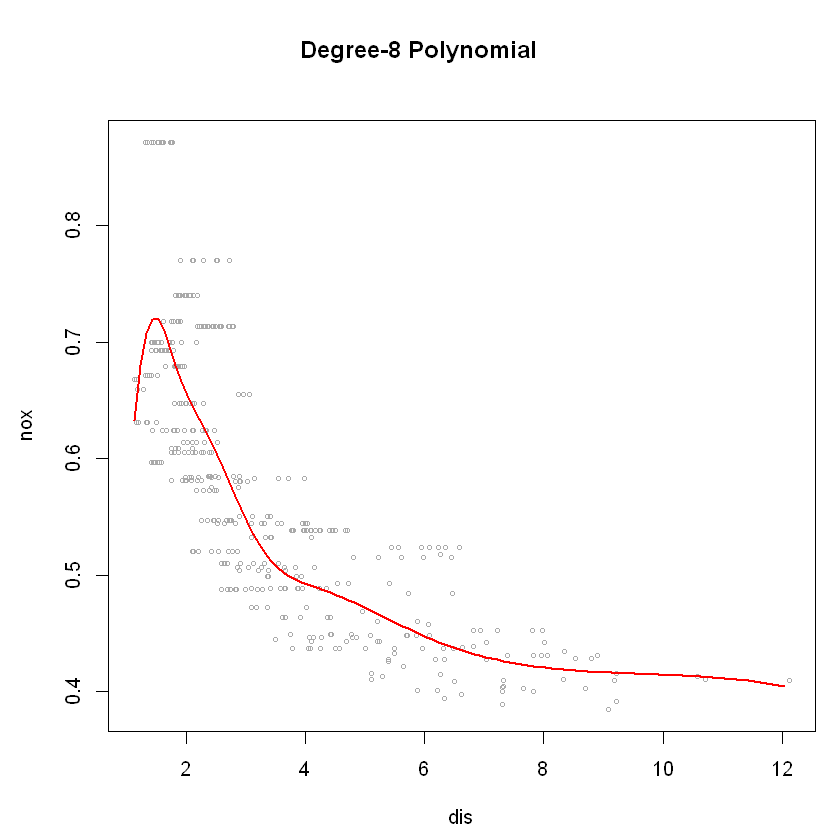

In [696]:
rs.fit = lm(nox ~ bs(dis, df = 8), data = Boston)

preds = predict(rs.fit, newdata=list(dis=dis.grid), se=TRUE)

se.bands = cbind(preds$fit +2* preds$se.fit, preds$fit-2*preds$se.fit)

par(mfrow=c(1,1), mar=c(4.5 ,4.5 ,1 ,1), oma=c(0,0,4,0))
plot(Boston$dis, Boston$nox, xlim=dislims, cex =.5, col = "darkgrey", xlab="dis", ylab="nox")
title (glue("Degree-8 Polynomial"), outer=T)

lines(dis.grid, preds$fit, col = "red", lwd = 2)
